# outcell vs in-hex

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

import numpy as np

from Utils import hexagon, square

In [2]:
outcell = square(1, 1)
print(outcell)

pitch_x = 1.2
num = 4

offset = np.arange(0, num, dtype=int) * pitch_x
print(offset)

outcell_mat = np.tile(outcell, (num, 1, 1))
outcell_mat[:, :, 0] += offset[:, np.newaxis]
print(outcell_mat)

[[ 0.5  0.5]
 [-0.5  0.5]
 [-0.5 -0.5]
 [ 0.5 -0.5]]
[0.  1.2 2.4 3.6]
[[[ 0.5  0.5]
  [-0.5  0.5]
  [-0.5 -0.5]
  [ 0.5 -0.5]]

 [[ 1.7  0.5]
  [ 0.7  0.5]
  [ 0.7 -0.5]
  [ 1.7 -0.5]]

 [[ 2.9  0.5]
  [ 1.9  0.5]
  [ 1.9 -0.5]
  [ 2.9 -0.5]]

 [[ 4.1  0.5]
  [ 3.1  0.5]
  [ 3.1 -0.5]
  [ 4.1 -0.5]]]


In [3]:
inhex = hexagon(4)
print(inhex) 

inhex[:, 0] += 5
inhex[:, 1] += 4
print(inhex) 

[[ 4.00000000e+00 -2.30940108e+00]
 [ 4.00000000e+00  2.30940108e+00]
 [ 2.82820064e-16  4.61880215e+00]
 [-4.00000000e+00  2.30940108e+00]
 [-4.00000000e+00 -2.30940108e+00]
 [-8.48460191e-16 -4.61880215e+00]]
[[ 9.          1.69059892]
 [ 9.          6.30940108]
 [ 5.          8.61880215]
 [ 1.          6.30940108]
 [ 1.          1.69059892]
 [ 5.         -0.61880215]]


In [4]:
from shapely.geometry import Polygon

inhex = Polygon(inhex)
outcells = [Polygon(cell) for cell in outcell_mat]
print(inhex)
print(outcells)

POLYGON ((9 1.6905989232414975, 9 6.309401076758503, 5 8.618802153517006, 1 6.309401076758503, 1.0000000000000004 1.6905989232414966, 4.999999999999999 -0.6188021535170058, 9 1.6905989232414975))
[<POLYGON ((0.5 0.5, -0.5 0.5, -0.5 -0.5, 0.5 -0.5, 0.5 0.5))>, <POLYGON ((1.7 0.5, 0.7 0.5, 0.7 -0.5, 1.7 -0.5, 1.7 0.5))>, <POLYGON ((2.9 0.5, 1.9 0.5, 1.9 -0.5, 2.9 -0.5, 2.9 0.5))>, <POLYGON ((4.1 0.5, 3.1 0.5, 3.1 -0.5, 4.1 -0.5, 4.1 0.5))>]


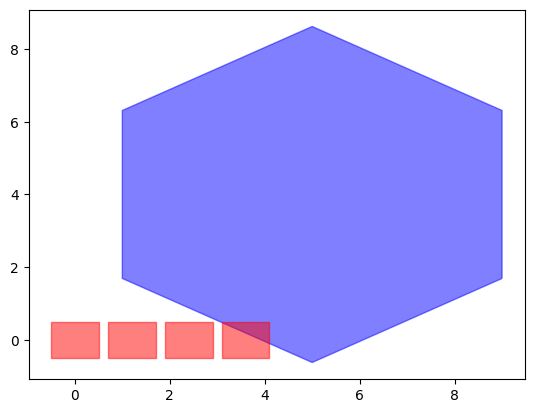

In [5]:
from shapely.plotting import plot_polygon

import matplotlib.pyplot as plt

# Plot inhex
fig, ax = plt.subplots()
plot_polygon(inhex, ax=ax, add_points=False, color='blue', alpha=0.5)

# Plot outcells
for cell in outcells:
    plot_polygon(cell, ax=ax, add_points=False, color='red', alpha=0.5)

plt.show()

In [6]:
intersects = [inhex.intersects(cell) for cell in outcells]
print(np.any(intersects))

True
